In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

# New section

In [ ]:
!kaggle datasets download -d hemendrasr/pizza-vs-ice-cream

pizza-vs-ice-cream.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
datazip=zipfile.ZipFile("/content/pizza-vs-ice-cream.zip")
datazip.extractall("/content/")
datazip.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Generators

trainds = tf.keras.utils.image_dataset_from_directory(

              directory = '/content/dataset/train',
              labels='inferred',
              label_mode='int',
              batch_size=32,
              image_size=(256, 256),
           )

testds = tf.keras.utils.image_dataset_from_directory(

              directory = '/content/dataset/test',
              labels='inferred',
              label_mode='int',
              batch_size=32,
              image_size=(256, 256),
           )

Found 718 files belonging to 2 classes.
Found 106 files belonging to 2 classes.


In [ ]:
print(f'Number of Batches: {718//32}')

Number of Batches: 22


In [ ]:
# Normalization

def scale_down_px(image, label):

  image = tf.cast(image/255, tf.float32)

  return image, label

In [ ]:
trainds = trainds.map(scale_down_px)
testds = testds.map(scale_down_px)

In [ ]:
trainds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [102]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation = 'relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size= (2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides=2, padding='valid'))



model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [103]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 246016)            0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [104]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [105]:
history = model.fit(trainds, validation_data = testds, epochs=10)

Epoch 1/10
23/23 [==============================] - 5s 82ms/step - loss: 1.8498 - accuracy: 0.6170 - val_loss: 0.4800 - val_accuracy: 0.7642
Epoch 2/10
23/23 [==============================] - 2s 78ms/step - loss: 0.4651 - accuracy: 0.7981 - val_loss: 0.3990 - val_accuracy: 0.8019
Epoch 3/10
23/23 [==============================] - 2s 81ms/step - loss: 0.3232 - accuracy: 0.8579 - val_loss: 0.3337 - val_accuracy: 0.8396
Epoch 4/10
23/23 [==============================] - 2s 80ms/step - loss: 0.2470 - accuracy: 0.8955 - val_loss: 0.2901 - val_accuracy: 0.8491
Epoch 5/10
23/23 [==============================] - 3s 83ms/step - loss: 0.1579 - accuracy: 0.9373 - val_loss: 0.3030 - val_accuracy: 0.8302
Epoch 6/10
23/23 [==============================] - 2s 79ms/step - loss: 0.0824 - accuracy: 0.9735 - val_loss: 0.2982 - val_accuracy: 0.8774
Epoch 7/10
23/23 [==============================] - 2s 80ms/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.2515 - val_accuracy: 0.8868
Epoch 8/10
23

In [106]:
import matplotlib.pyplot as plt


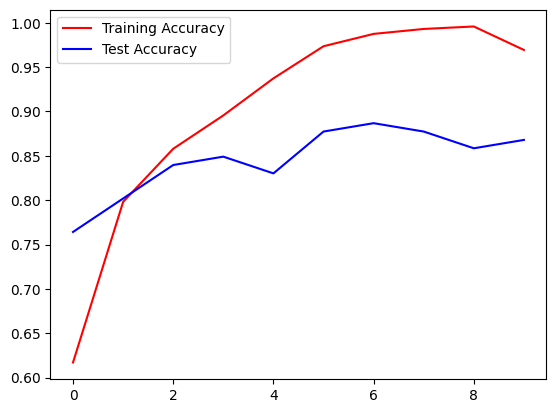

In [107]:
plt.plot(history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Test Accuracy')
plt.legend()
plt.show()

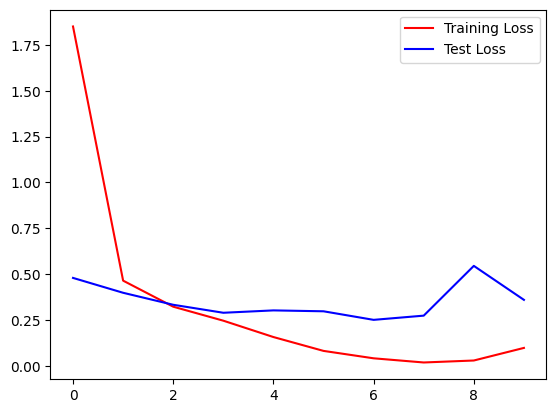

In [108]:
plt.plot(history.history['loss'], color='red', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Test Loss')
plt.legend()
plt.show()

In [109]:
import cv2

In [150]:
test_img = cv2.imread('/content/dataset/test/pizza/0086_jpg.rf.8599fcbdffcba9cd19e5eb3d773e1c7d.jpg')
# test_img

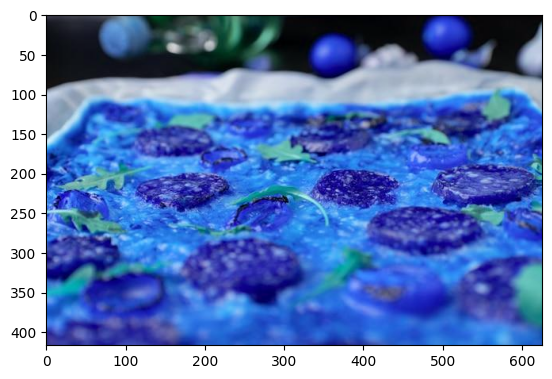

In [151]:
plt.imshow(test_img)

In [152]:
test_img.shape

(417, 626, 3)

In [153]:
test_img = cv2.resize(test_img, (256, 256))

In [154]:
test_img.shape


(256, 256, 3)

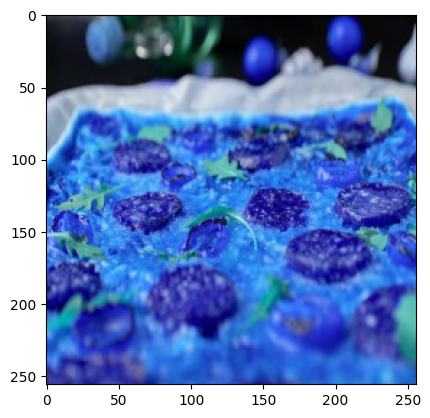

In [155]:
plt.imshow(test_img)


In [156]:
test_input = test_img.reshape(1, 256, 256, 3)


In [157]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)

In [159]:
model.predict(test_input)[0][0]

1/1 [==============================] - 0s 27ms/step


0.0

In [142]:
test_img2= cv2.imread('/content/dataset/test/icecream/00633_jpg.rf.3c8bfc51a44fb017a792c2990312c8e8.jpg')
# test_img

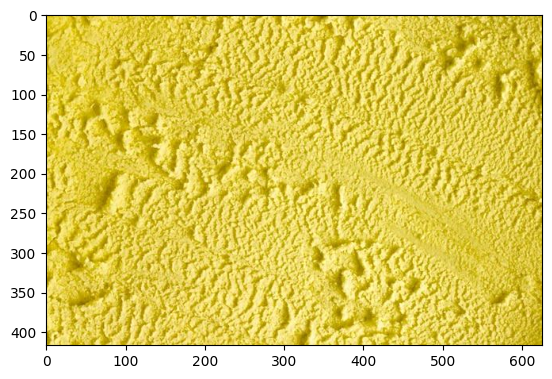

In [143]:
plt.imshow(test_img2)


In [144]:
test_img2.shape


(417, 626, 3)

In [145]:
test_img2 = cv2.resize(test_img2, (256, 256))


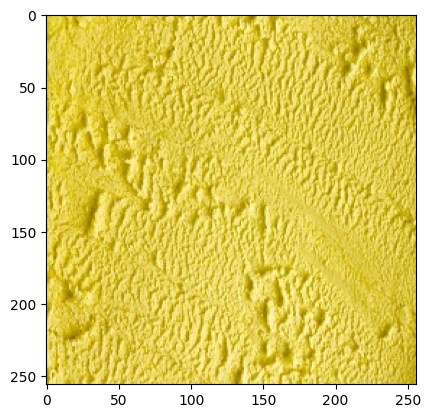

In [146]:
plt.imshow(test_img2)


In [147]:
test_input2 = test_img2.reshape(1, 256, 256, 3)

In [148]:
model.predict(test_input2)


1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

In [149]:
model.predict(test_input2)[0][0]


1/1 [==============================] - 0s 19ms/step


1.0

In [169]:
output = model.predict(test_input)[0][0]
print(f'Output is: {output} \n')

if output < 1.0:
  print('Nice Pizza!!')
else:
  print('Yummy Icecream!!')

1/1 [==============================] - 0s 19ms/step
Output is: 0.0 

Nice Pizza!!


In [171]:
output = model.predict(test_input2)[0][0]
print(f'Output is: {output} \n')

if output < 1.0:
  print('Nice Pizza!!')
else:
  print('Yummy Icecream!!')

1/1 [==============================] - 0s 19ms/step
Output is: 1.0 

Yummy Icecream!!


In [172]:
test_img3= cv2.imread('/content/dataset/test/pizza/00349_jpg.rf.def71adac7a0795ec550d2ec65c13df8.jpg')
# test_img

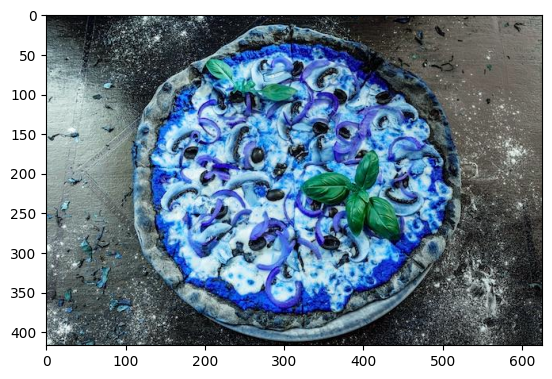

In [173]:
plt.imshow(test_img3)


In [174]:
test_img3 = cv2.resize(test_img3, (256, 256))


In [175]:
test_input3 = test_img3.reshape(1, 256, 256, 3)

In [176]:
model.predict(test_input3)[0][0]


1/1 [==============================] - 0s 18ms/step


0.0